In [21]:
import keras.datasets.mnist as mnist
from keras.optimizers import Adam
from keras.layers import Input, InputLayer, BatchNormalization, Activation, UpSampling2D, Conv2DTranspose
from keras.models import Model, Sequential
from keras.layers.core import Dense, Dropout, Reshape, Flatten
from keras.layers import Conv2D
from keras.layers.advanced_activations import LeakyReLU
from keras import initializers

import matplotlib.pyplot as plt
import imageio
import os
import numpy as np
from shutil import copyfile
import matplotlib.pyplot as plt

In [54]:
(x_train, y_train), (x_test, y_test) = mnist.load_data(path='mnist')

In [3]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

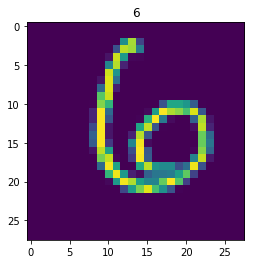

(28, 28)


In [4]:
i = 100
plt.title(str(y_test[i]))
plt.imshow(x_test[i])
plt.show()
print(x_test[i].shape)

In [31]:
for r, d, f in os.walk('./emojies/'):
    for file in f:
        if('face' in file):
            source = os.path.join(r, file)
            target = os.path.join('./emojies_face/', file)
            print(source)
            copyfile(source, target)

./emojies/woman-facepalming-type-5_1f926-1f3fe-200d-2640-fe0f.png
./emojies/dizzy-face_1f635.png
./emojies/white-frowning-face_2639.png
./emojies/tired-face_1f62b.png
./emojies/hugging-face_1f917.png
./emojies/face-with-no-good-gesture_1f645.png
./emojies/dragon-face_1f432.png
./emojies/face-with-ok-gesture_emoji-modifier-fitzpatrick-type-4_1f646-1f3fd_1f3fd.png
./emojies/panda-face_1f43c.png
./emojies/face-massage_emoji-modifier-fitzpatrick-type-3_1f486-1f3fc_1f3fc.png
./emojies/face-with-open-mouth_1f62e.png
./emojies/last-quarter-moon-with-face_1f31c.png
./emojies/face-with-ok-gesture_emoji-modifier-fitzpatrick-type-5_1f646-1f3fe_1f3fe.png
./emojies/money-mouth-face_1f911.png
./emojies/man-getting-face-massage_1f486-200d-2642-fe0f.png
./emojies/man-facepalming-type-1-2_1f926-1f3fb-200d-2642-fe0f.png
./emojies/unicorn-face_1f984.png
./emojies/person-with-pouting-face_1f64e.png
./emojies/clock-face-two-thirty_1f55d.png
./emojies/clock-face-eleven-thirty_1f566.png
./emojies/dog-face_1f

In [32]:
files = []
# r=root, d=directories, f = files
for r, d, f in os.walk('./emojies_face/'):
    for file in f:
            files.append(os.path.join(r, file))

a = np.zeros((len(files),72,72,4))
for i in range(0, len(files)):
    file = files[i]
    print(file)
    image = imageio.imread(file)
    a[i] = image
a

./emojies_face/woman-facepalming-type-5_1f926-1f3fe-200d-2640-fe0f.png
./emojies_face/dizzy-face_1f635.png
./emojies_face/white-frowning-face_2639.png
./emojies_face/tired-face_1f62b.png
./emojies_face/hugging-face_1f917.png
./emojies_face/face-with-no-good-gesture_1f645.png
./emojies_face/dragon-face_1f432.png
./emojies_face/face-with-ok-gesture_emoji-modifier-fitzpatrick-type-4_1f646-1f3fd_1f3fd.png
./emojies_face/panda-face_1f43c.png
./emojies_face/face-massage_emoji-modifier-fitzpatrick-type-3_1f486-1f3fc_1f3fc.png
./emojies_face/face-with-open-mouth_1f62e.png
./emojies_face/last-quarter-moon-with-face_1f31c.png
./emojies_face/face-with-ok-gesture_emoji-modifier-fitzpatrick-type-5_1f646-1f3fe_1f3fe.png
./emojies_face/money-mouth-face_1f911.png
./emojies_face/man-getting-face-massage_1f486-200d-2642-fe0f.png
./emojies_face/man-facepalming-type-1-2_1f926-1f3fb-200d-2642-fe0f.png
./emojies_face/unicorn-face_1f984.png
./emojies_face/person-with-pouting-face_1f64e.png
./emojies_face/clo

array([[[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        ...,

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
 

In [3]:
random_dim = 100

In [4]:
def get_optimizer():
    return Adam(lr=0.0002, beta_1=0.5)

In [59]:
def get_generator(optimizer):
    
    model = Sequential()
    
#     generator.add(Dense(256, input_dim=random_dim, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
#     generator.add(LeakyReLU(0.2))

#     generator.add(Dense(512))
#     generator.add(LeakyReLU(0.2))

#     generator.add(Dense(1024))
#     generator.add(LeakyReLU(0.2))

#     generator.add(Dense(72*72*4, activation='tanh'))
#     generator.add(Reshape(target_shape=(72,72,4)))

    dropout = 0.4
    depth = 64+64+64+64
    dim = 7
    
    # In: 100
    # Out: dim x dim x depth
    model.add(Dense(dim*dim*depth, input_dim=100))
    model.add(BatchNormalization(momentum=0.9))
    model.add(Activation('relu'))
    model.add(Reshape((dim, dim, depth)))
    model.add(Dropout(dropout))

    # In: dim x dim x depth
    # Out: 2*dim x 2*dim x depth/2
    model.add(UpSampling2D())
    model.add(Conv2DTranspose(int(depth/2), 5, padding='same'))
    model.add(BatchNormalization(momentum=0.9))
    model.add(Activation('relu'))

    model.add(UpSampling2D())
    model.add(Conv2DTranspose(int(depth/4), 5, padding='same'))
    model.add(BatchNormalization(momentum=0.9))
    model.add(Activation('relu'))

    model.add(Conv2DTranspose(int(depth/8), 5, padding='same'))
    model.add(BatchNormalization(momentum=0.9))
    model.add(Activation('relu'))

    # Out: 28 x 28 x 1 grayscale image [0.0,1.0] per pix
    model.add(Conv2DTranspose(1, 5, padding='same'))
    model.add(Activation('sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer=optimizer)
    
    return generator

In [60]:
optimizer = get_optimizer()

In [61]:
generator = get_generator(optimizer)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


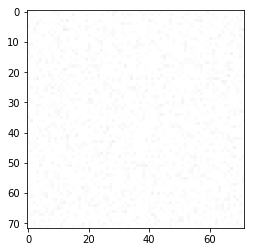

(1, 72, 72, 4)
[[[[ 0.00263689  0.00312444 -0.00964912  0.00549327]
   [ 0.02101854  0.01989051  0.03037084  0.01202715]
   [-0.00606407 -0.04415647 -0.02156124  0.01560446]
   ...
   [-0.01448743  0.01021161 -0.03890074 -0.02418592]
   [ 0.01254577  0.02182646 -0.0041379   0.00669661]
   [ 0.00760948 -0.02968239 -0.00868043 -0.01245205]]

  [[ 0.03812782 -0.02963197  0.00649646 -0.03514976]
   [ 0.00981066  0.04856612 -0.01302535  0.00265841]
   [ 0.0022783   0.01173482  0.0002394  -0.00460842]
   ...
   [ 0.00070665  0.05830597 -0.01887186 -0.01329424]
   [-0.00718209 -0.00175568 -0.04518187  0.01185908]
   [ 0.02257351  0.00960887  0.02132579 -0.00435577]]

  [[ 0.02032697  0.01892612  0.00887106  0.00663611]
   [-0.00410136  0.01436084 -0.00547059 -0.01757535]
   [-0.01518804 -0.00491962 -0.01964671  0.00929216]
   ...
   [-0.01897737 -0.00406532 -0.01186312  0.01969126]
   [-0.02376669 -0.01662002  0.0165815   0.00220242]
   [-0.00530783 -0.01022342  0.00532643  0.01175735]]

  ..

In [63]:
noise = np.random.normal(0, 1, size=[1, random_dim])
generated_images = generator.predict(noise)
plt.imshow(generated_images[0])
plt.show()
print(generated_images.shape)
print(generated_images)

In [35]:
def get_discriminator(optimizer):
    
    input_shape = (72,72,4)
    dropout = 0.4
    
    discriminator = Sequential()
    discriminator.add(Conv2D(5, 3, strides=2, input_shape=input_shape, padding='same'))
    discriminator.add(LeakyReLU(alpha=0.2))
    discriminator.add(Dropout(dropout))
    
    discriminator.add(Conv2D(4, 3, strides=2, padding='same'))
    discriminator.add(LeakyReLU(alpha=0.2))
    discriminator.add(Dropout(dropout))
    
    discriminator.add(Conv2D(3, 3, strides=2, padding='same'))
    discriminator.add(LeakyReLU(alpha=0.2))
    discriminator.add(Dropout(dropout))
    
    discriminator.add(Conv2D(2, 3, strides=2, padding='same'))
    discriminator.add(LeakyReLU(alpha=0.2))
    discriminator.add(Dropout(dropout))
    
    discriminator.add(Conv2D(1, 3, strides=2, padding='same'))
    discriminator.add(LeakyReLU(alpha=0.2))
    discriminator.add(Dropout(dropout))
    
    discriminator.add(Flatten())
    discriminator.add(Dense(1))
    
    discriminator.compile(loss='binary_crossentropy', optimizer=optimizer)
    
    return discriminator

In [36]:
discriminator = get_discriminator(optimizer)
discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 36, 36, 5)         185       
_________________________________________________________________
leaky_re_lu_25 (LeakyReLU)   (None, 36, 36, 5)         0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 36, 36, 5)         0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 18, 18, 4)         184       
_________________________________________________________________
leaky_re_lu_26 (LeakyReLU)   (None, 18, 18, 4)         0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 18, 18, 4)         0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 9, 9, 3)           111       
__________

In [38]:
discrimination = discriminator.predict(generated_images)
print(discrimination.shape)
print(discrimination)

(7, 1)
[[-0.00237226]
 [-0.00084297]
 [-0.00509105]
 [-0.002304  ]
 [-0.00136048]
 [-0.00011764]
 [-0.0031365 ]]


In [162]:
temp_model = Sequential()
temp_model.add(Dense(400, input_dim=(100)))
# temp_model.add(Activation('tanh'))
temp_model.add(Activation('sigmoid'))
temp_model.add(Reshape(target_shape=(10,10,4)))
temp_model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))
temp_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 400)               40400     
_________________________________________________________________
activation_26 (Activation)   (None, 400)               0         
_________________________________________________________________
reshape_5 (Reshape)          (None, 10, 10, 4)         0         
Total params: 40,400
Trainable params: 40,400
Non-trainable params: 0
_________________________________________________________________


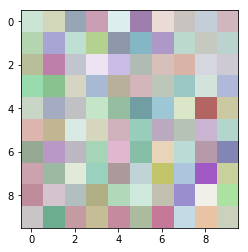

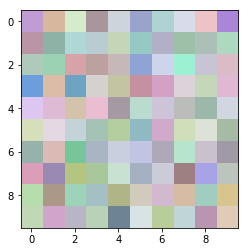

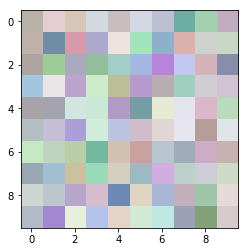

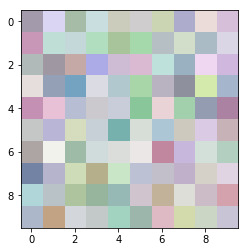

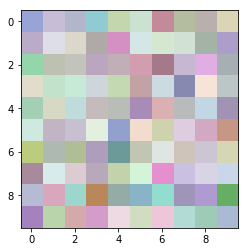

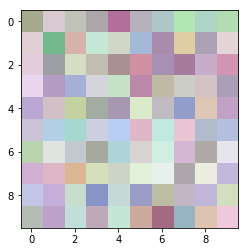

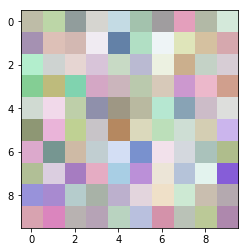

In [168]:
noise = np.random.normal(0,1,size=(7, 100))
prediction = temp_model.predict(noise)
for i in range(0,7):
    plt.imshow(prediction[i])
    plt.show()

In [104]:
temp_model = Sequential()

temp_model.add(InputLayer(input_shape=(72,72,4), name="input_layer"))

temp_model.add(Conv2D(filters=64 * 1, strides=2, kernel_size=3, padding="same"))
temp_model.add(LeakyReLU(alpha=0.2))
temp_model.add(Dropout(0.4))

temp_model.add(Conv2D(filters=64 * 2, strides=2, kernel_size=3, padding="same"))
temp_model.add(LeakyReLU(alpha=0.2))
temp_model.add(Dropout(0.4))

temp_model.add(Conv2D(filters=64 * 4, strides=2, kernel_size=3, padding="same"))
temp_model.add(LeakyReLU(alpha=0.2))
temp_model.add(Dropout(0.4))

temp_model.add(Conv2D(filters=64 * 8, strides=2, kernel_size=3, padding="same"))
temp_model.add(LeakyReLU(alpha=0.2))
temp_model.add(Dropout(0.4))

temp_model.add(Conv2D(filters=64 * 16, strides=2, kernel_size=3, padding="same"))
temp_model.add(LeakyReLU(alpha=0.2))
temp_model.add(Dropout(0.4))

temp_model.add(Flatten())
temp_model.add(Dense(1))
temp_model.add(Activation('sigmoid'))

temp_model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))
temp_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 36, 36, 64)        2368      
_________________________________________________________________
leaky_re_lu_20 (LeakyReLU)   (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 18, 18, 128)       73856     
_________________________________________________________________
leaky_re_lu_21 (LeakyReLU)   (None, 18, 18, 128)       0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 9, 9, 256)         295168    
__________

In [108]:
i = 1
x = np.array([a[i]])
y = temp_model.predict(x)
print(y.shape)
print(y)
plt.imshow(y[0,:,:,0:3])
plt.show()
plt.imshow(y[0,:,:,4:7])
plt.show()
plt.imshow(y[0,:,:,100:103])
plt.show()

(1, 1)
[[0.00300588]]


IndexError: too many indices for array